### Excercise 2 Second: Write a query that directly answers a predetermined question from a business stakeholder

In [4]:
#!conda install pandasql

In [2]:
#importing libraries
import pandas as pd
import numpy as np
from pandasql import sqldf

In [9]:
#read json lines using pands
brands=pd.read_json("C:\\Users\\georg\\Downloads\\Brands\\brands.json",lines=True)
receipts=pd.read_json("C:\\Users\\georg\\Downloads\\Receipts\\receipts.json",lines=True)
users=pd.read_json("C:\\Users\\georg\\Downloads\\Users\\users.json",lines=True)

In [94]:
brands_copy=brands.copy()
#clean data
brands_copy['_id'] = brands_copy['_id'].map(lambda x: x['$oid'])
brands_copy['cpg']=brands_copy['cpg'].map(lambda x: x['$id']['$oid'])
#removed cpg_ref since its not relevant for the exercise
brands_copy.tail()

,_id,barcode,category,categoryCode,cpg,name,topBrand,brandCode
1162,5f77274dbe37ce6b592e90c0,511111116752,Baking,BAKING,5f77274dbe37ce6b592e90bf,test brand @1601644365844,NaN,NaN
1163,5dc1fca91dda2c0ad7da64ae,511111706328,Breakfast & Cereal,NaN,53e10d6368abd3c7065097cc,Dippin Dots® Cereal,NaN,DIPPIN DOTS CEREAL
1164,5f494c6e04db711dd8fe87e7,511111416173,Candy & Sweets,CANDY_AND_SWEETS,5332fa12e4b03c9a25efd1e7,test brand @1598639215217,NaN,TEST BRANDCODE @1598639215217
1165,5a021611e4b00efe02b02a57,511111400608,Grocery,NaN,5332f5f6e4b03c9a25efd0b4,LIPTON TEA Leaves,0.0,LIPTON TEA Leaves
1166,6026d757be37ce6369301468,511111019930,Baking,BAKING,6026d757be37ce6369301467,test brand @1613158231643,0.0,TEST BRANDCODE @1613158231644


In [99]:
receipts_copy=receipts.copy()
brands_receipts=pd.DataFrame()
#clean data from $date
receipts_copy['_id'] = receipts_copy['_id'].map(lambda x: x['$oid'])
receipts_copy['dateScanned'] = receipts_copy['dateScanned'].map(lambda x: x['$date'])
#rewardsreceiptsitemlist to be exploded
brands_receipts[['dateScanned','rewardsReceiptItemList','rewardsReceiptStatus','totalSpent']] = receipts_copy[['dateScanned','rewardsReceiptItemList','rewardsReceiptStatus','totalSpent']]
#these are important columns necessity  
brands_receipts.head()

,dateScanned,rewardsReceiptItemList,rewardsReceiptStatus,totalSpent
0,1609687531000,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,26.0
1,1609687483000,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,11.0
2,1609687537000,"[{'needsFetchReview': False, 'partnerItemId': ...",REJECTED,10.0
3,1609687534000,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,28.0
4,1609687506000,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,1.0


In [12]:
users_copy=users.copy()
#clean data
users_copy['_id'] = users_copy['_id'].map(lambda x: x['$oid'])
users_copy['createdDate'] = users_copy['createdDate'].map(lambda x: x['$date'])
users_copy['lastLogin'] = users_copy['lastLogin'].map(lambda x: x['$date'],na_action='ignore')
users_copy.head()

,_id,active,createdDate,lastLogin,role,signUpSource,state
0,5ff1e194b6a9d73a3a9f1052,True,1609687444800,1.609688e+12,consumer,Email,WI
1,5ff1e194b6a9d73a3a9f1052,True,1609687444800,1.609688e+12,consumer,Email,WI
2,5ff1e194b6a9d73a3a9f1052,True,1609687444800,1.609688e+12,consumer,Email,WI
3,5ff1e1eacfcf6c399c274ae6,True,1609687530554,1.609688e+12,consumer,Email,WI
4,5ff1e194b6a9d73a3a9f1052,True,1609687444800,1.609688e+12,consumer,Email,WI


In [13]:
#creating an sql query to avoid passing globals everytime
pysqldf = lambda q: sqldf(q, globals())

### When considering total number of item purchased from receipts with 'rewardsReceiptStatus’ of ‘Accepted’ or ‘Rejected’, which is greater?

In [14]:
status_spent=brands_receipts[['rewardsReceiptStatus','totalSpent']]
query="""SELECT CASE
    WHEN rewardsReceiptStatus='FINISHED' THEN 'Accepted' --Finished is Accepted
    WHEN rewardsReceiptStatus='FLAGGED' THEN 'Other'    --Flagged might not be Rejected
    WHEN rewardsReceiptStatus='REJECTED' THEN 'Rejected'
    WHEN rewardsReceiptStatus='PENDING' THEN 'Other'
    WHEN rewardsReceiptStatus='SUBMITTED' THEN 'Accepted'
    END AS statusReceipt,AVG(totalSpent) as averageSpent
                FROM status_spent
                WHERE statusReceipt!='Other' --if we you want to check flagged and pending just remove this
                GROUP BY statusReceipt"""

In [24]:
pysqldf(query)

,statusReceipt,averageSpent
0,Accepted,80.854305
1,Rejected,23.326056


<AxesSubplot:xlabel='statusReceipt'>

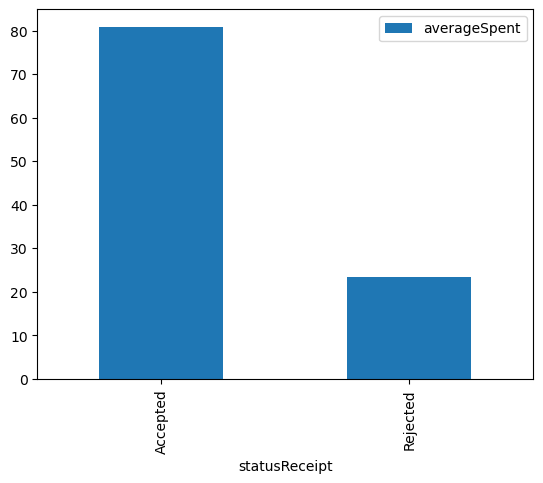

In [23]:
pysqldf(query).plot.bar(x='statusReceipt',y='averageSpent')

#### Average Total Spent on Accepted is greater than Rejected

### Exercise 3 Third: Evaluate Data Quality Issues in the Data Provided

In [32]:
brands_receipts

,dateScanned,rewardsReceiptItemList,rewardsReceiptStatus,totalSpent
0,1609687531000,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,26.00
1,1609687483000,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,11.00
2,1609687537000,"[{'needsFetchReview': False, 'partnerItemId': ...",REJECTED,10.00
3,1609687534000,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,28.00
4,1609687506000,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,1.00
...,...,...,...,...
1114,1614594147000,"[{'barcode': 'B076FJ92M4', 'description': 'mue...",REJECTED,34.96
1115,1614613361873,NaN,SUBMITTED,NaN
1116,1614607657664,NaN,SUBMITTED,NaN
1117,1614604048000,"[{'barcode': 'B076FJ92M4', 'description': 'mue...",REJECTED,34.96


In [100]:
New_brands_receipts=brands_receipts.explode('rewardsReceiptItemList',ignore_index=True)

In [101]:
#New_brands_receipts=New_brands_receipts[New_brands_receipts['rewardsReceiptStatus']=="FINISHED"]

In [102]:
New_brands_receipts

,dateScanned,rewardsReceiptItemList,rewardsReceiptStatus,totalSpent
0,1609687531000,"{'barcode': '4011', 'description': 'ITEM NOT F...",FINISHED,26.00
1,1609687483000,"{'barcode': '4011', 'description': 'ITEM NOT F...",FINISHED,11.00
2,1609687483000,"{'barcode': '028400642255', 'description': 'DO...",FINISHED,11.00
3,1609687537000,"{'needsFetchReview': False, 'partnerItemId': '...",REJECTED,10.00
4,1609687534000,"{'barcode': '4011', 'description': 'ITEM NOT F...",FINISHED,28.00
...,...,...,...,...
7376,1614613361873,NaN,SUBMITTED,NaN
7377,1614607657664,NaN,SUBMITTED,NaN
7378,1614604048000,"{'barcode': 'B076FJ92M4', 'description': 'muel...",REJECTED,34.96
7379,1614604048000,"{'barcode': 'B07BRRLSVC', 'description': 'thin...",REJECTED,34.96


In [104]:
receipt_brand_=New_brands_receipts['rewardsReceiptItemList'].apply(pd.Series)

In [105]:
receipt_brand_scan=pd.concat([New_brands_receipts,receipt_brand_], axis=1)

In [106]:
receipt_brand_scan.drop('rewardsReceiptItemList',axis=1,inplace=True)

In [107]:
receipt_brand_scan.count()

dateScanned                           7381
rewardsReceiptStatus                  7381
totalSpent                            6946
barcode                               3090
description                           6560
finalPrice                            6767
itemPrice                             6767
needsFetchReview                       813
partnerItemId                         6941
preventTargetGapPoints                 358
quantityPurchased                     6767
userFlaggedBarcode                     337
userFlaggedNewItem                     323
userFlaggedPrice                       299
userFlaggedQuantity                    299
needsFetchReviewReason                 219
pointsNotAwardedReason                 340
pointsPayerId                         1267
rewardsGroup                          1731
rewardsProductPartnerId               2269
userFlaggedDescription                 205
originalMetaBriteBarcode                71
originalMetaBriteDescription            10
brandCode  

In [108]:
receipt_brand_scan_non=receipt_brand_scan[ (receipt_brand_scan['barcode'].isnull()==False)]

In [109]:
receipt_brand_scan_non

,dateScanned,rewardsReceiptStatus,totalSpent,barcode,description,finalPrice,itemPrice,needsFetchReview,partnerItemId,preventTargetGapPoints,...,originalMetaBriteQuantityPurchased,pointsEarned,targetPrice,competitiveProduct,originalFinalPrice,originalMetaBriteItemPrice,deleted,priceAfterCoupon,0,metabriteCampaignId
0,1609687531000,FINISHED,26.00,4011,ITEM NOT FOUND,26.00,26.00,False,1,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1609687483000,FINISHED,11.00,4011,ITEM NOT FOUND,1,1,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1609687483000,FINISHED,11.00,028400642255,DORITOS TORTILLA CHIP SPICY SWEET CHILI REDUCE...,10.00,10.00,True,2,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1609687534000,FINISHED,28.00,4011,ITEM NOT FOUND,28.00,28.00,False,1,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1609687506000,FINISHED,1.00,4011,ITEM NOT FOUND,1,1,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7373,1614594748000,REJECTED,34.96,B07BRRLSVC,thindust summer face mask - sun protection nec...,11.99,11.99,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.99,NaN,NaN
7374,1614594147000,REJECTED,34.96,B076FJ92M4,mueller austria hypergrind precision electric ...,22.97,22.97,NaN,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.97,NaN,NaN
7375,1614594147000,REJECTED,34.96,B07BRRLSVC,thindust summer face mask - sun protection nec...,11.99,11.99,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.99,NaN,NaN
7378,1614604048000,REJECTED,34.96,B076FJ92M4,mueller austria hypergrind precision electric ...,22.97,22.97,NaN,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.97,NaN,NaN


In [122]:
query2="""SELECT * 
                    FROM receipt_brand_scan_non r
                    JOIN brands_copy b
                    ON r.barcode=b.barcode
                    ORDER BY dateScanned Desc"""

In [123]:
pysqldf(query2)

,dateScanned,rewardsReceiptStatus,totalSpent,barcode,description,finalPrice,itemPrice,needsFetchReview,partnerItemId,preventTargetGapPoints,...,0,metabriteCampaignId,_id,barcode,category,categoryCode,cpg,name,topBrand,brandCode
0,1611610563000,FINISHED,4721.95,511111802358,CRACKER BARREL,168.84,168.84,1.0,1057,None,...,None,None,57d9580ee4b0ac389136a2b6,511111802358,Dairy,None,559c2234e4b06aca36af13c6,Cracker Barrel Cheese,0.0,CRACKER BARREL
1,1611610563000,FINISHED,4721.95,511111001768,CHEETOS,22.00,22.00,NaN,1083,None,...,None,None,585a963ce4b03e62d1ce0e78,511111001768,Snacks,None,5332f5fbe4b03c9a25efd0ba,Cheetos,1.0,CHEETOS
2,1611610563000,FINISHED,4721.95,511111602118,JELL-O,3.00,3.00,NaN,1125,None,...,None,None,57ebc017e4b0ac389136a336,511111602118,Baking,None,559c2234e4b06aca36af13c6,Jell-O,0.0,JELL-O
3,1611610563000,FINISHED,4721.95,511111004127,V8,10.00,10.00,NaN,1411,None,...,None,None,5a8c3226e4b07f0a2dac8942,511111004127,Beverages,None,5a734034e4b0d58f376be874,V8,0.0,V8
4,1611610563000,FINISHED,4721.95,511111004127,V8,3.49,3.49,NaN,1414,None,...,None,None,5a8c3226e4b07f0a2dac8942,511111004127,Beverages,None,5a734034e4b0d58f376be874,V8,0.0,V8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,1610747178000,FINISHED,373.55,511111001485,TOSTITOS,3.99,3.99,NaN,1191,None,...,None,None,585a972de4b03e62d1ce0e96,511111001485,Snacks,None,5332f5fbe4b03c9a25efd0ba,Tostitos,NaN,TOSTITOS
85,1610745895000,FINISHED,427.81,511111204206,SWANSON,5.58,5.58,NaN,1083,None,...,None,None,5a8c36dbe4b0ccf165fac9e9,511111204206,Canned Goods & Soups,None,5a734034e4b0d58f376be874,Swanson,0.0,SWANSON
86,1610745895000,FINISHED,427.81,511111001485,TOSTITOS,2.98,2.98,NaN,1178,None,...,None,None,585a972de4b03e62d1ce0e96,511111001485,Snacks,None,5332f5fbe4b03c9a25efd0ba,Tostitos,NaN,TOSTITOS
87,1610745895000,FINISHED,427.81,511111001485,TOSTITOS,3.99,3.99,NaN,1191,None,...,None,None,585a972de4b03e62d1ce0e96,511111001485,Snacks,None,5332f5fbe4b03c9a25efd0ba,Tostitos,NaN,TOSTITOS


In [124]:
New_brands_receipts['rewardsReceiptItemList'].map(lambda x: x['barcode'])
# error here is expected

KeyError: 'barcode'

In [45]:
num=0
for i in New_brands_receipts['rewardsReceiptItemList']:
    try:
        if i['barcode']==True:
            print("Working")
    except KeyError:
        print(i)
print(num)

{'brandCode': 'MISSION', 'competitorRewardsGroup': 'TACO BELL TACO SHELLS', 'description': 'MSSN TORTLLA', 'discountedItemPrice': '2.23', 'finalPrice': '2.23', 'itemPrice': '2.23', 'originalReceiptItemText': 'MSSN TORTLLA', 'partnerItemId': '1009', 'quantityPurchased': 1}
{'description': 'flipbelt level terrain waist pouch, neon yellow, large/32-35', 'discountedItemPrice': '28.57', 'finalPrice': '28.57', 'itemPrice': '28.57', 'originalReceiptItemText': 'flipbelt level terrain waist pouch, neon yellow, large/32-35', 'partnerItemId': '0', 'priceAfterCoupon': '28.57', 'quantityPurchased': 1}
{'description': 'flipbelt level terrain waist pouch, neon yellow, large/32-35', 'discountedItemPrice': '28.57', 'finalPrice': '28.57', 'itemPrice': '28.57', 'originalReceiptItemText': 'flipbelt level terrain waist pouch, neon yellow, large/32-35', 'partnerItemId': '0', 'priceAfterCoupon': '28.57', 'quantityPurchased': 1}
{'description': 'mueller austria hypergrind precision electric spice/coffee grind

TypeError: 'float' object is not subscriptable

### One Data Quality Issues 
In the column "rewardsReceiptItemList" the barcode and brandcode are present alternatively its better to have one standardized key for the items in list. choosing between barcode and brandcode could be difficult.If We choose barcode as a primary key many dint have a value. If We choose brandcode many of them dint have brandcode as well.

Joining with Brand Table will be challenging but not impossible, I have tried a similar join in Query2. Unavaibility of values seems to be the major issue. It could be because of the scanning process of fetch rewards or certain receipts being in the wrong way